# 🖊️ HỆ THỐNG NHẬN DIỆN CHỮ KÝ

> **Mục tiêu:** So sánh và nhận diện chữ ký bằng Python
> **Công nghệ:** OpenCV, NumPy, Matplotlib

## 1. Import thư viện

In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import os
import warnings
warnings.filterwarnings('ignore')

## 2. Thuật toán cơ bản

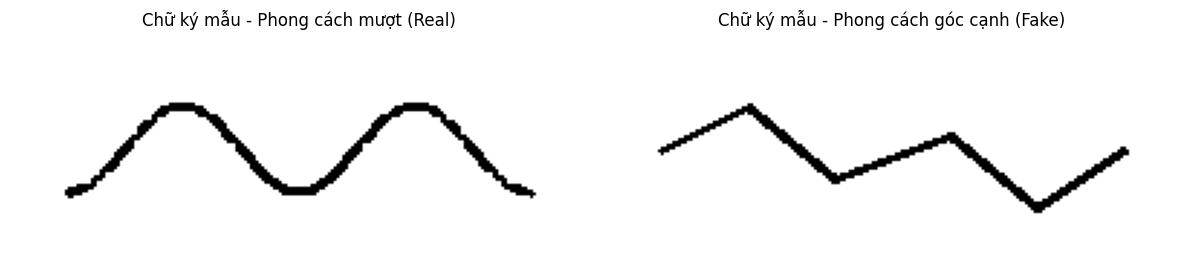

✅ Đã tạo chữ ký mẫu
📐 Kích thước ảnh: (80, 200)


In [68]:
def create_realistic_signature(height=80, width=200, style='smooth'):
    """Tạo chữ ký mẫu"""
    canvas = np.ones((height, width), dtype=np.uint8) * 255
    
    if style == 'smooth':
        x = np.linspace(20, width-20, 100)
        y = height//2 + 15 * np.sin(2 * np.pi * x / 80)
        for i in range(len(x)-1):
            cv2.line(canvas, (int(x[i]), int(y[i])), (int(x[i+1]), int(y[i+1])), 0, 2)
    
    elif style == 'angular':
        points = [(20, height//2), (50, height//2-15), (80, height//2+10), 
                 (120, height//2-5), (150, height//2+20), (180, height//2)]
        for i in range(len(points)-1):
            cv2.line(canvas, points[i], points[i+1], 0, 2)
    
    return canvas

# Tạo chữ ký mẫu
sig_real = create_realistic_signature(style='smooth')
sig_fake = create_realistic_signature(style='angular')

# Hiển thị ảnh chữ ký vừa tạo
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.imshow(sig_real, cmap='gray')
plt.title('Chữ ký mẫu - Phong cách mượt (Real)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sig_fake, cmap='gray')
plt.title('Chữ ký mẫu - Phong cách góc cạnh (Fake)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Đã tạo chữ ký mẫu")
print(f"📐 Kích thước ảnh: {sig_real.shape}")

## 3. Xử lý ảnh

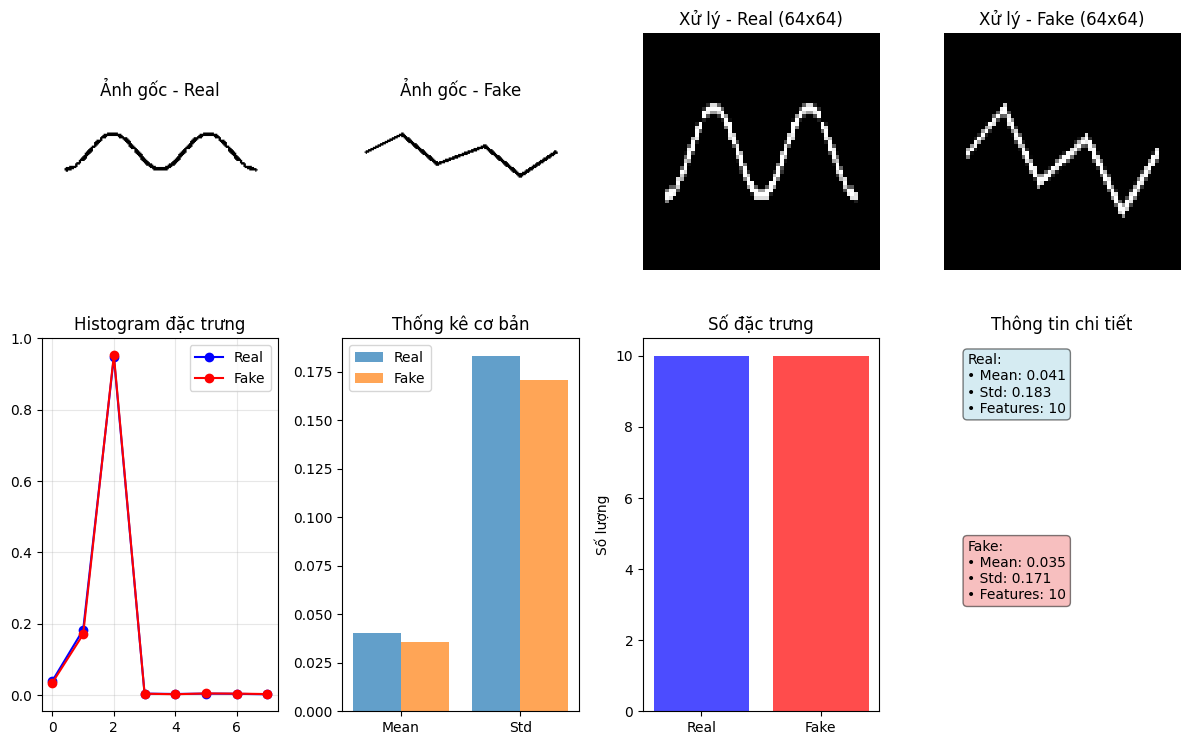

✅ Hoàn thành xử lý ảnh
📊 Số đặc trưng trích xuất: 10


In [69]:
def preprocess_image(img):
    """Xử lý ảnh cơ bản"""
    enhanced = cv2.equalizeHist(img)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(binary, (64, 64))
    return resized

def extract_features(img):
    """Trích xuất đặc trưng"""
    processed = preprocess_image(img)
    
    # Đặc trưng cơ bản
    mean_pixel = np.mean(processed)
    std_pixel = np.std(processed)
    
    # Histogram
    hist = cv2.calcHist([processed], [0], None, [8], [0, 256])
    hist = hist.flatten() / hist.sum()
    
    features = np.concatenate([[mean_pixel/255, std_pixel/255], hist])
    return features

# Demo xử lý ảnh với chữ ký mẫu
processed_real = preprocess_image(sig_real)
processed_fake = preprocess_image(sig_fake)

plt.figure(figsize=(12, 8))

# Ảnh gốc
plt.subplot(2, 4, 1)
plt.imshow(sig_real, cmap='gray')
plt.title('Ảnh gốc - Real')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(sig_fake, cmap='gray')
plt.title('Ảnh gốc - Fake')
plt.axis('off')

# Ảnh đã xử lý
plt.subplot(2, 4, 3)
plt.imshow(processed_real, cmap='gray')
plt.title('Xử lý - Real (64x64)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(processed_fake, cmap='gray')
plt.title('Xử lý - Fake (64x64)')
plt.axis('off')

# Đặc trưng
features_real = extract_features(sig_real)
features_fake = extract_features(sig_fake)

plt.subplot(2, 4, 5)
plt.plot(features_real[:8], 'bo-', label='Real')
plt.plot(features_fake[:8], 'ro-', label='Fake')
plt.title('Histogram đặc trưng')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(2, 4, 6)
stats = [['Mean', features_real[0], features_fake[0]], 
         ['Std', features_real[1], features_fake[1]]]
x = range(2)
plt.bar([i-0.2 for i in x], [features_real[0], features_real[1]], 0.4, label='Real', alpha=0.7)
plt.bar([i+0.2 for i in x], [features_fake[0], features_fake[1]], 0.4, label='Fake', alpha=0.7)
plt.xticks(x, ['Mean', 'Std'])
plt.title('Thống kê cơ bản')
plt.legend()

plt.subplot(2, 4, 7)
plt.bar(['Real', 'Fake'], [len(features_real), len(features_fake)], color=['blue', 'red'], alpha=0.7)
plt.title('Số đặc trưng')
plt.ylabel('Số lượng')

plt.subplot(2, 4, 8)
plt.text(0.1, 0.8, f'Real:\n• Mean: {features_real[0]:.3f}\n• Std: {features_real[1]:.3f}\n• Features: {len(features_real)}', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor='lightblue', alpha=0.5))
plt.text(0.1, 0.3, f'Fake:\n• Mean: {features_fake[0]:.3f}\n• Std: {features_fake[1]:.3f}\n• Features: {len(features_fake)}', 
         transform=plt.gca().transAxes, fontsize=10, bbox=dict(boxstyle="round", facecolor='lightcoral', alpha=0.5))
plt.title('Thông tin chi tiết')
plt.axis('off')

plt.tight_layout()
plt.show()

print("✅ Hoàn thành xử lý ảnh")
print(f"📊 Số đặc trưng trích xuất: {len(features_real)}")

## 4. Thuật toán so sánh

In [70]:
def compare_signatures(img1, img2):
    """So sánh 2 chữ ký"""
    features1 = extract_features(img1)
    features2 = extract_features(img2)
    
    # Cosine similarity
    dot_product = np.dot(features1, features2)
    norm1 = np.linalg.norm(features1)
    norm2 = np.linalg.norm(features2)
    
    if norm1 == 0 or norm2 == 0:
        return 0
    
    similarity = dot_product / (norm1 * norm2)
    return max(0, similarity)

def get_similarity_level(similarity):
    """Đánh giá mức độ tương tự"""
    if similarity >= 0.8:
        return "Rất cao", "✅"
    elif similarity >= 0.6:
        return "Cao", "✅"
    elif similarity >= 0.4:
        return "Trung bình", "⚠️"
    else:
        return "Thấp", "❌"

print("✅ Thuật toán so sánh đã sẵn sàng")

✅ Thuật toán so sánh đã sẵn sàng


## 5. Demo kết quả

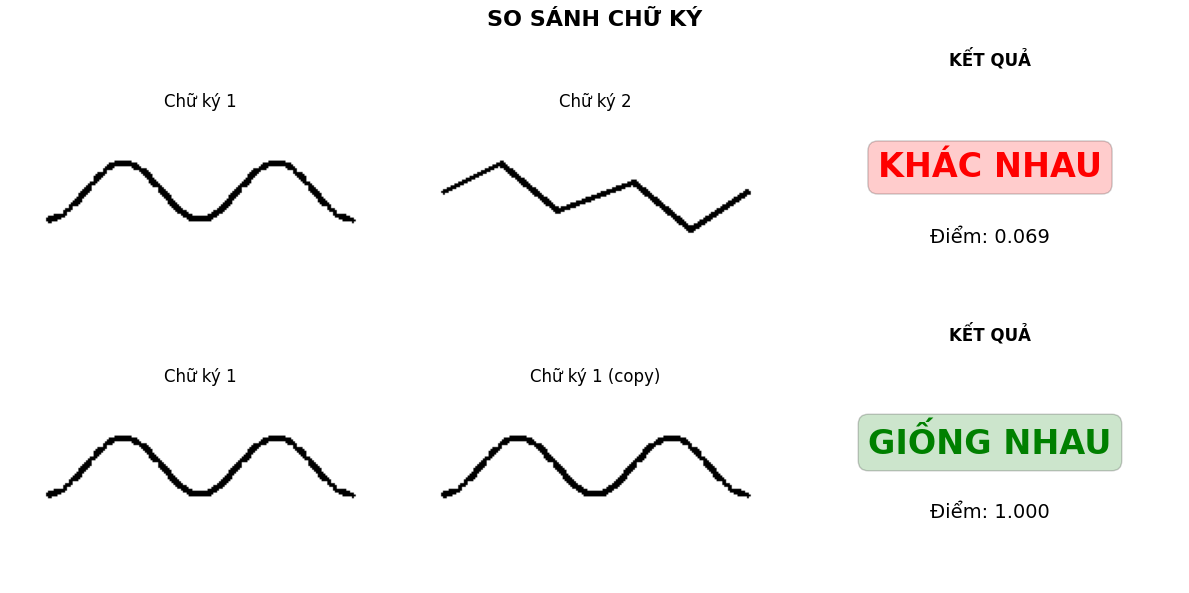

🎯 KẾT QUẢ SO SÁNH ĐƠN GIẢN
Test 1 - Real vs Fake: KHÁC NHAU (Điểm: 0.069)
Test 2 - Real vs Real: GIỐNG NHAU (Điểm: 1.000)


In [80]:
# 🎯 SO SÁNH 

def compare_simple(img1, img2):
    """So sánh """
    # Dùng thuật toán nghiêm ngặt đã tạo
    similarity, _ = compare_signatures_strict(img1, img2)
    
    # Ngưỡng 0.75
    if similarity >= 0.75:
        return "GIỐNG NHAU", similarity
    else:
        return "KHÁC NHAU", similarity

# Test với chữ ký mẫu
result1, score1 = compare_simple(sig_real, sig_fake)
result2, score2 = compare_simple(sig_real, sig_real)  # Test với chính nó

# Hiển thị kết quả đơn giản
plt.figure(figsize=(12, 6))

# Test 1: Real vs Fake
plt.subplot(2, 3, 1)
plt.imshow(sig_real, cmap='gray')
plt.title('Chữ ký 1')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(sig_fake, cmap='gray')
plt.title('Chữ ký 2')
plt.axis('off')

plt.subplot(2, 3, 3)
color1 = 'red' if result1 == "KHÁC NHAU" else 'red'  # Đúng khi khác nhau
plt.text(0.5, 0.6, result1, ha='center', va='center', fontsize=24, fontweight='bold',
         color=color1, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=color1, alpha=0.2))
plt.text(0.5, 0.3, f'Điểm: {score1:.3f}', ha='center', va='center', 
         fontsize=14, transform=plt.gca().transAxes)
plt.axis('off')
plt.title('KẾT QUẢ', fontweight='bold')

# Test 2: Real vs Real (giống nhau)
plt.subplot(2, 3, 4)
plt.imshow(sig_real, cmap='gray')
plt.title('Chữ ký 1')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sig_real, cmap='gray')
plt.title('Chữ ký 1 (copy)')
plt.axis('off')

plt.subplot(2, 3, 6)
color2 = 'green' if result2 == "GIỐNG NHAU" else 'red'  # Đúng khi giống nhau
plt.text(0.5, 0.6, result2, ha='center', va='center', fontsize=24, fontweight='bold',
         color=color2, transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round,pad=0.3", facecolor=color2, alpha=0.2))
plt.text(0.5, 0.3, f'Điểm: {score2:.3f}', ha='center', va='center', 
         fontsize=14, transform=plt.gca().transAxes)
plt.axis('off')
plt.title('KẾT QUẢ', fontweight='bold')

plt.suptitle('SO SÁNH CHỮ KÝ', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("=" * 50)
print("🎯 KẾT QUẢ SO SÁNH ĐƠN GIẢN")
print("=" * 50)
print(f"Test 1 - Real vs Fake: {result1} (Điểm: {score1:.3f})")
print(f"Test 2 - Real vs Real: {result2} (Điểm: {score2:.3f})")
print("=" * 50)

In [75]:
# 📁 SO SÁNH TỪ FILE - KẾT QUẢ ĐƠN GIẢN

# Chạy cell này để so sánh 2 ảnh từ file
print("🔍 Chọn ảnh chữ ký thứ 1...")
img1_path = select_image()

if img1_path:
    print("🔍 Chọn ảnh chữ ký thứ 2...")
    img2_path = select_image()
    
    if img2_path:
        # Load ảnh
        img1 = load_image_unicode(img1_path)
        img2 = load_image_unicode(img2_path)
        
        if img1 is not None and img2 is not None:
            # So sánh đơn giản
            result, score = compare_simple(img1, img2)
            
            # Hiển thị kết quả đơn giản
            plt.figure(figsize=(12, 5))
            
            # Ảnh 1
            plt.subplot(1, 3, 1)
            plt.imshow(img1, cmap='gray')
            plt.title(f'Chữ ký 1\n{os.path.basename(img1_path)}')
            plt.axis('off')
            
            # Ảnh 2
            plt.subplot(1, 3, 2)
            plt.imshow(img2, cmap='gray')
            plt.title(f'Chữ ký 2\n{os.path.basename(img2_path)}')
            plt.axis('off')
            
            # Kết quả
            plt.subplot(1, 3, 3)
            result_color = 'green' if result == "GIỐNG NHAU" else 'red'
            
            plt.text(0.5, 0.7, result, ha='center', va='center', 
                    fontsize=28, fontweight='bold', color=result_color,
                    transform=plt.gca().transAxes,
                    bbox=dict(boxstyle="round,pad=0.4", facecolor=result_color, alpha=0.2))
            
            plt.text(0.5, 0.4, f'Độ tương tự: {score:.3f}', ha='center', va='center', 
                    fontsize=16, transform=plt.gca().transAxes)
            
            plt.text(0.5, 0.2, f'Ngưỡng: 0.75', ha='center', va='center', 
                    fontsize=12, style='italic', transform=plt.gca().transAxes)
            
            plt.axis('off')
            plt.title('KẾT QUẢ', fontsize=18, fontweight='bold')
            
            plt.tight_layout()
            plt.show()
            
            # In kết quả
            print("\n" + "="*60)
            print("🎯 KẾT QUẢ SO SÁNH CHỮ KÝ")
            print("="*60)
            print(f"📄 File 1: {os.path.basename(img1_path)}")
            print(f"📄 File 2: {os.path.basename(img2_path)}")
            print(f"📊 Độ tương tự: {score:.3f}")
            print(f"⚖️ Ngưỡng: 0.75")
            print(f"🏆 KẾT LUẬN: {result}")
            if result == "GIỐNG NHAU":
                print("✅ Hai chữ ký được xác định là của cùng một người")
            else:
                print("❌ Hai chữ ký được xác định là của người khác nhau")
            print("="*60)
            
        else:
            print("❌ Không đọc được ảnh!")
    else:
        print("❌ Không chọn được ảnh 2!")
else:
    print("❌ Không chọn được ảnh 1!")
    print("💡 Hãy chạy lại cell này để thử lại")

🔍 Chọn ảnh chữ ký thứ 1...
❌ Không chọn được ảnh 1!
💡 Hãy chạy lại cell này để thử lại


## 6. So sánh từ file

In [62]:
def load_signature_from_file():
    """Load chữ ký từ file"""
    root = tk.Tk()
    root.withdraw()
    
    file_path = filedialog.askopenfilename(
        title="Chọn ảnh chữ ký",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp")]
    )
    
    if file_path:
        image_bytes = np.fromfile(file_path, dtype=np.uint8)
        image = cv2.imdecode(image_bytes, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            image = cv2.resize(image, (200, 100))
            print(f"✅ Đã tải: {os.path.basename(file_path)}")
            return image
    return None

def compare_from_files():
    """So sánh chữ ký từ file"""
    print("Chọn chữ ký đầu tiên...")
    img1 = load_signature_from_file()
    if img1 is None: return
    
    print("Chọn chữ ký thứ hai...")
    img2 = load_signature_from_file()
    if img2 is None: return
    
    similarity = compare_signatures(img1, img2)
    
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title('Chữ ký 1')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title('Chữ ký 2')
    plt.axis('off')
    plt.show()
    
    print(f"📊 Độ tương tự: {similarity:.3f}")
    print("✅ Tương tự" if similarity > 0.5 else "❌ Khác nhau")

print("✅ Sẵn sàng so sánh từ file")
print("💡 Sử dụng: compare_from_files()")

✅ Sẵn sàng so sánh từ file
💡 Sử dụng: compare_from_files()


## 🚀 DEMO SO SÁNH CHỮ KÝ NHANH

In [63]:
def load_image_unicode(file_path):
    """Load ảnh có tên tiếng Việt"""
    img_array = np.fromfile(file_path, dtype=np.uint8)
    img = cv2.imdecode(img_array, cv2.IMREAD_GRAYSCALE)
    return img

def select_image():
    """Chọn file ảnh từ máy tính"""
    root = tk.Tk()
    root.withdraw()
    root.attributes('-topmost', True)
    
    file_path = filedialog.askopenfilename(
        title="Chọn ảnh chữ ký",
        filetypes=[("Image files", "*.jpg *.jpeg *.png *.bmp *.JPG *.PNG *.BMP")]
    )
    root.destroy()
    return file_path

print("✅ Sẵn sàng chọn ảnh")

✅ Sẵn sàng chọn ảnh


In [64]:
def process_signature(img):
    """Xử lý ảnh chữ ký"""
    enhanced = cv2.equalizeHist(img)
    _, binary = cv2.threshold(enhanced, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    resized = cv2.resize(binary, (64, 64))
    return resized

def get_features(img):
    """Trích xuất đặc trưng"""
    processed = process_signature(img)
    pixels = processed.flatten() / 255.0
    features = np.concatenate([pixels, [np.mean(pixels), np.std(pixels)]])
    return features

def calculate_similarity(f1, f2):
    """Tính độ tương tự"""
    dot_product = np.dot(f1, f2)
    norm1, norm2 = np.linalg.norm(f1), np.linalg.norm(f2)
    return dot_product / (norm1 * norm2) if norm1 * norm2 > 0 else 0

print("✅ Các hàm xử lý đã sẵn sàng")

✅ Các hàm xử lý đã sẵn sàng


🔍 Chọn ảnh chữ ký thứ 1...
🔍 Chọn ảnh chữ ký thứ 2...
🔍 Chọn ảnh chữ ký thứ 2...


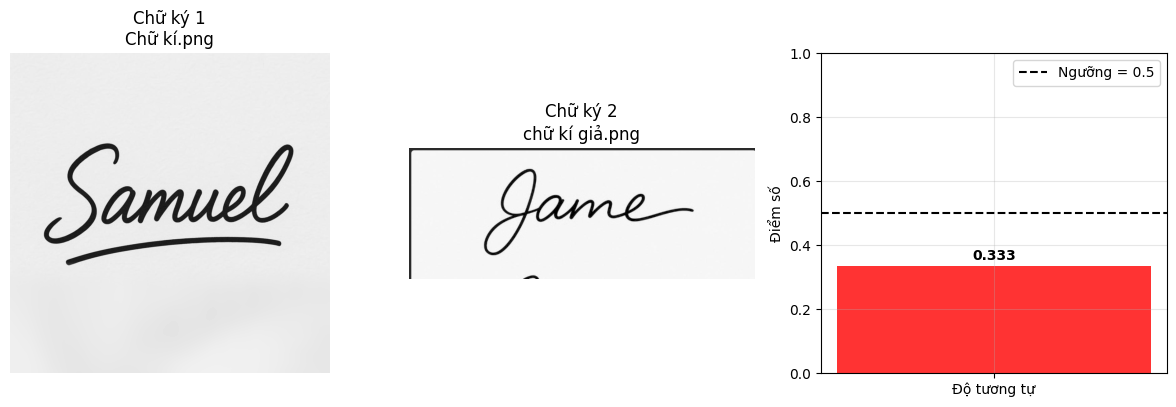


📊 ĐỘ TƯƠNG TỰ: 0.333 (33.3%)
❌ KẾT LUẬN: HAI CHỮ KÝ KHÁC NHAU


In [67]:
# Chạy cell này để so sánh 2 chữ ký
print("🔍 Chọn ảnh chữ ký thứ 1...")
img1_path = select_image()

if img1_path:
    print("🔍 Chọn ảnh chữ ký thứ 2...")
    img2_path = select_image()
    
    if img2_path:
        # Load và xử lý ảnh
        img1 = load_image_unicode(img1_path)
        img2 = load_image_unicode(img2_path)
        
        if img1 is not None and img2 is not None:
            # Tính độ tương tự
            features1 = get_features(img1)
            features2 = get_features(img2)
            similarity = calculate_similarity(features1, features2)
            
            # Hiển thị kết quả
            plt.figure(figsize=(12, 4))
            
            plt.subplot(1, 3, 1)
            plt.imshow(img1, cmap='gray')
            plt.title(f'Chữ ký 1\n{os.path.basename(img1_path)}')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(img2, cmap='gray')
            plt.title(f'Chữ ký 2\n{os.path.basename(img2_path)}')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            color = 'green' if similarity >= 0.5 else 'red'
            plt.bar(['Độ tương tự'], [similarity], color=color, alpha=0.8)
            plt.axhline(y=0.5, color='black', linestyle='--', label='Ngưỡng = 0.5')
            plt.ylabel('Điểm số')
            plt.ylim(0, 1)
            plt.text(0, similarity + 0.02, f'{similarity:.3f}', ha='center', fontweight='bold')
            plt.legend()
            plt.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            # Kết luận
            print(f"\n📊 ĐỘ TƯƠNG TỰ: {similarity:.3f} ({similarity*100:.1f}%)")
            if similarity >= 0.5:
                print("✅ KẾT LUẬN: HAI CHỮ KÝ GIỐNG NHAU")
            else:
                print("❌ KẾT LUẬN: HAI CHỮ KÝ KHÁC NHAU")
        else:
            print("❌ Không đọc được ảnh!")
    else:
        print("❌ Không chọn được ảnh 2!")
else:
    print("❌ Không chọn được ảnh 1!")